In [1]:


import pandas as pd
from lets_plot import *
import numpy as np
import matplotlib.pyplot as plt

camp = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
# chom = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')

camp.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
all_to_look_at = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y']

camp['pdays'] = camp['pdays'].replace(999, np.nan)
camp['poutcome'] = camp['poutcome'].replace('nonexistent', np.nan)
camp['previous'] = camp['previous'].replace(0, np.nan)

# camp.head(5)


In [5]:
camp['y'] = camp['y'].replace('no',0).replace('yes',1)
camp.rename(columns={'y':'sub2term'}, inplace=True)


<ipython-input-5-5de5b4d65805>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  camp['y'] = camp['y'].replace('no',0).replace('yes',1)


In [6]:
camp['campaign'] = camp['campaign'].astype('category')
camp.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [60]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [61]:
features = ['age', 'job', 'marital', 'education', 'nr.employed']
X = pd.get_dummies(camp[features], drop_first=True)
Y = camp['sub2term']

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
# Train it
clf.fit(X_train, Y_train)

# Test it
clf.score(X_test, Y_test)

0.8841650930671702

In [66]:
# Get confusion matrix
labels = sorted(set(Y_test))
cm = confusion_matrix(Y_test, Y_train, labels=labels)

# Convert to DataFrame
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_melted = cm_df.reset_index().melt(id_vars='index')
cm_melted.columns = ['Actual', 'Predicted', 'Count']

# Plot with lets-plot
plot = (
    ggplot(cm_melted, aes(x='Predicted', y='Actual', fill='Count')) +
    geom_tile(color='white') +
    geom_text(aes(label='Count'), color='black', size=12) +
    scale_fill_gradient(low='#DCE775', high='#558B2F') +
    theme_minimal() +
    labs(title='Confusion Matrix', x='Predicted', y='Actual')
)

plot

ValueError: Found input variables with inconsistent numbers of samples: [18535, 18534]

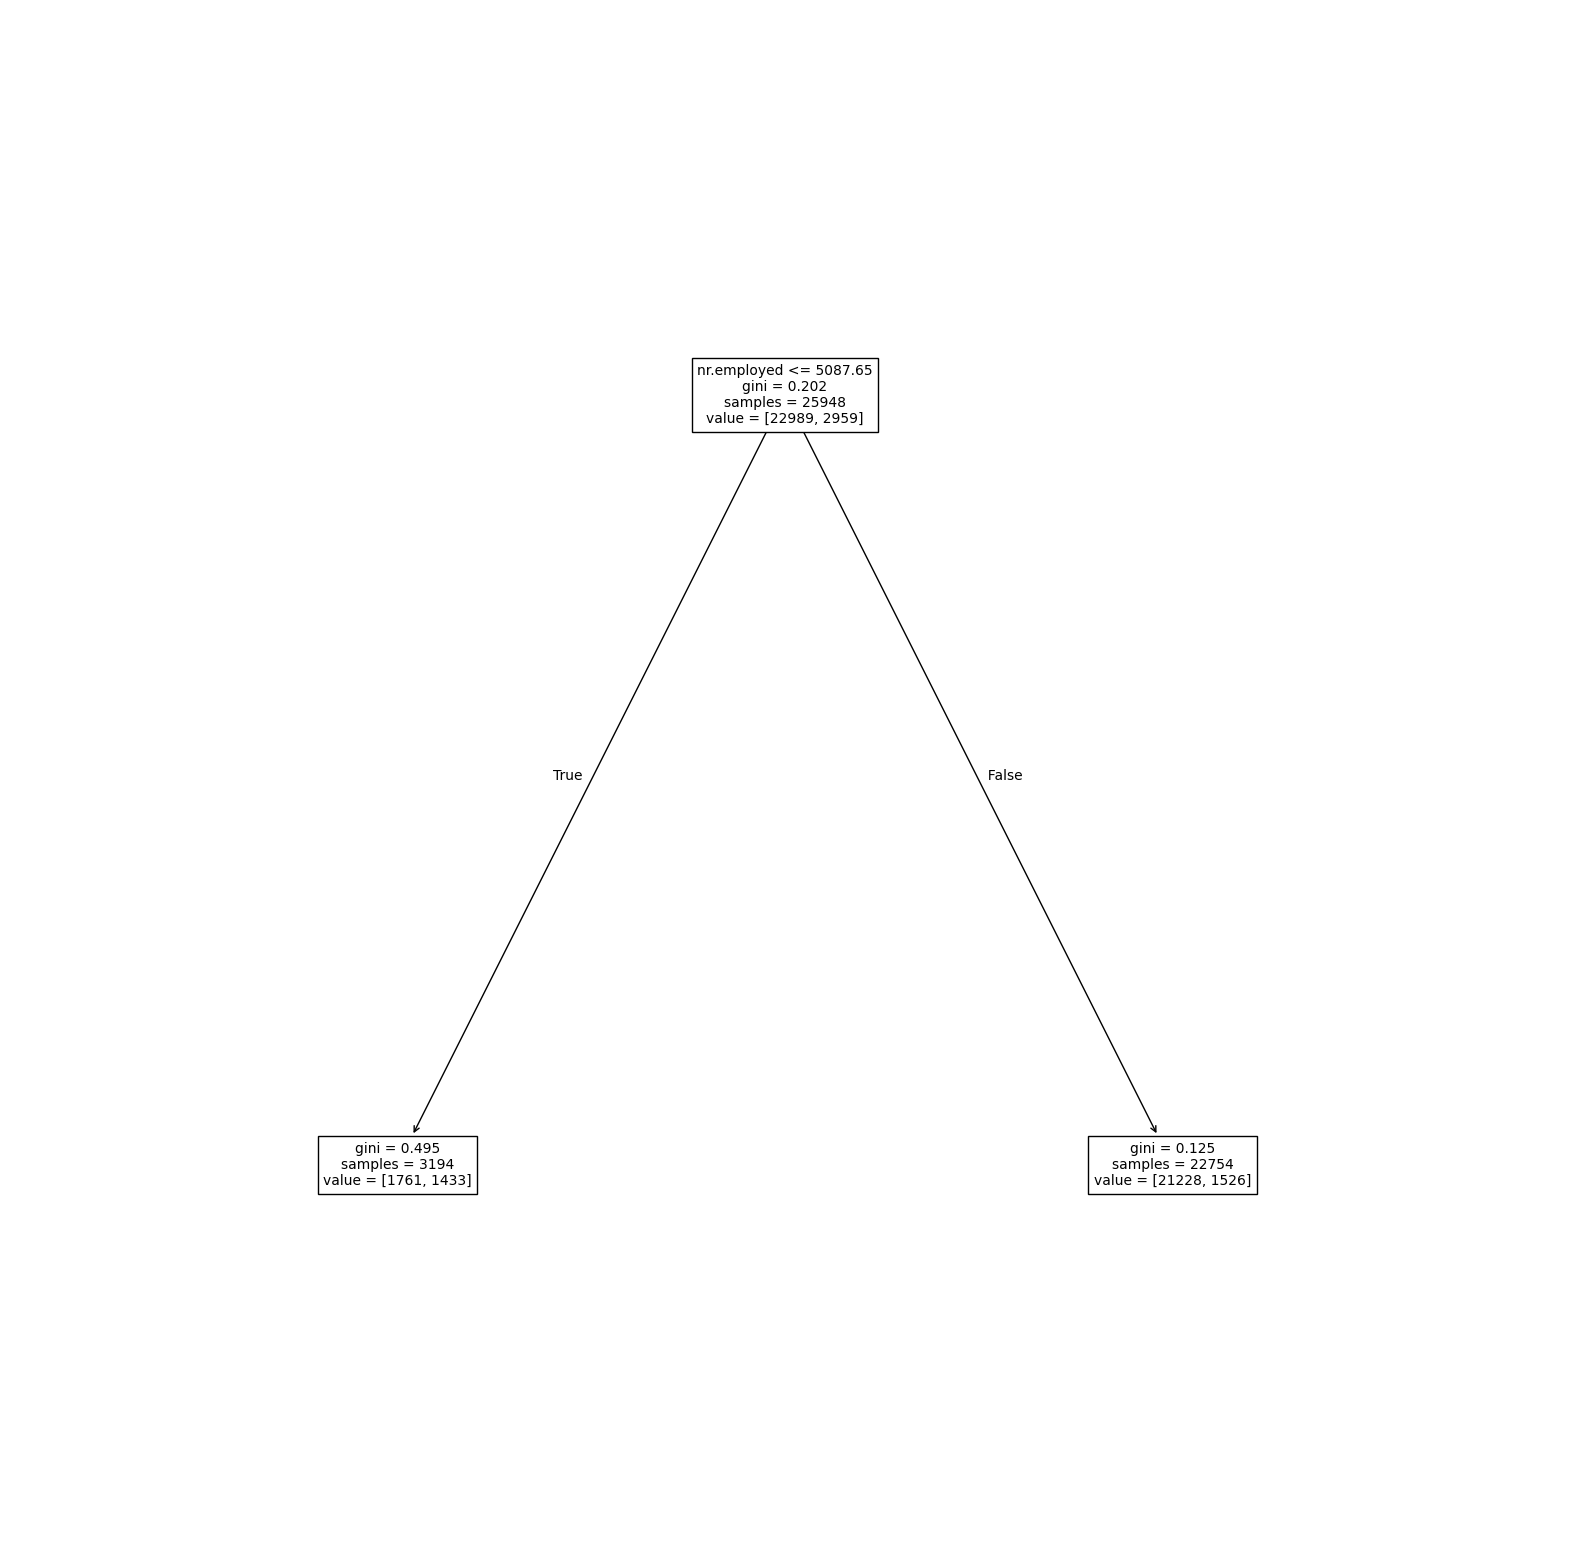

In [36]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()

In [10]:
clf = DecisionTreeClassifier()

# Train it
clf.fit(X_train, Y_train)

# Test it
clf.score(X_test, Y_test)

0.8751011599676288